# Author: **Mostafa Noaman Ahmed**
#### Copyright Mostafa Noaman Ahmed, 2022

**Not for distribution.**

# Enable accessing ***Google Drive*** through colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data and some information about it

In [ ]:
import pandas as pd

data_file = r"/content/drive/MyDrive/data.csv"
data = pd.read_csv(data_file)

In [ ]:
print(data.columns)

Index(['Hours', 'Scores'], dtype='object')


In [ ]:
print(data["Hours"].value_counts()[data["Hours"].value_counts()>1])

2.5    2
2.7    2
Name: Hours, dtype: int64


In [ ]:
print(data["Scores"].value_counts()[data["Scores"].value_counts()>1])

30    3
Name: Scores, dtype: int64


In [ ]:
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# Plot data before using ***Linear Regression*** model

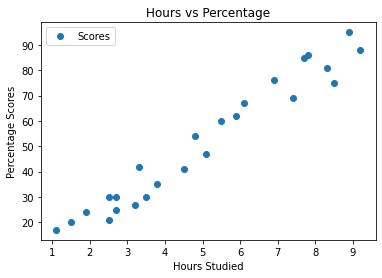

In [ ]:
import matplotlib.pyplot as plt

data.plot(x="Hours", y="Scores", style="o")
plt.title('Hours vs Percentage')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.show()

# Define the ***LinearRegression*** model and prepare our train and test labels

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = data[["Hours"]].to_numpy()
y = data[["Scores"]].to_numpy()

# Split the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Create object from the class ***LinearRegression*** and train our model using training data and their corresponding labels


In [ ]:
score_prediction_model = LinearRegression()

In [ ]:
score_prediction_model.fit(X_train, y_train)

LinearRegression()

# Plot data after using ***Linear Regression*** model

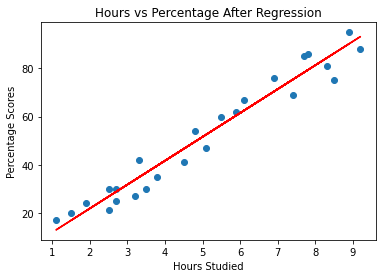

In [ ]:
# Plotting the regression line
line = score_prediction_model.coef_*X+score_prediction_model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.title('Hours vs Percentage After Regression')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.plot(X, line, color="red");
plt.show()

# Predict the percentage on the test dataset

In [ ]:
y_pred = score_prediction_model.predict(X_test)
print(f"Student predicted Percentage: {y_pred}%")

Student predicted Percentage: [[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]%


# Compare the actual and predicted results in the table according to test dataset

In [ ]:
actual = [x for lst in y_test for x in lst]
pred = [x for lst in y_pred for x in lst]

In [ ]:
loss_df = pd.DataFrame(list(zip(actual, pred)), columns=['Actual', 'Predicted'])            
print(loss_df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


# Enable user to predict as much times as he want

In [ ]:
while True:
    hrs = input("Please enter the number of Studied Hours per day: ")
    predicted = score_prediction_model.predict([[hrs]])
    if predicted[0][0] <= 100:
        print(f"Student predicted Percentage: {predicted[0][0]}%")
    else:
        print(f"Student predicted Percentage: 100%")
    
    restart = input('\nWould you like to restart? (y/n).\n')
    if restart.lower() != 'y':
        break

Please enter the number of Studied Hours per day: 12


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


Student predicted Percentage: 100%

Would you like to restart? (y/n).
y
Please enter the number of Studied Hours per day: 8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


Student predicted Percentage: 81.30341188657258%

Would you like to restart? (y/n).
y
Please enter the number of Studied Hours per day: 9.25


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


Student predicted Percentage: 93.69173248737539%

Would you like to restart? (y/n).
n


# Calculate the ***MAE*** of the model

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
